# **Import the packages**

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# **Data visualization**

In [16]:
df = pd.read_csv("amazon_reviews.csv")
print(df.head())

                               reviewId          userName  \
0  aa5edb63-03ac-4ee6-a953-faae82674c34  Gladiator Gaming   
1  88d1d21b-c93a-4202-9da0-bea7f8c0ce43       Javier Rojo   
2  4d963e1d-5e25-4cd0-b991-6cea00a49546     Carlos Magana   
3  835e2c90-c378-422d-851b-afdbaab7c368         mike lost   
4  689ef520-7364-43fc-8492-904960f62c10  Aaron Williamson   

                                             content  score  thumbsUpCount  \
0                                Great shopping app!      5              0   
1                                           Ugly app      2              0   
2  never thought of using but I think I will enjo...      5              0   
3  Easy and quick shopping, fast shipping only ta...      5              0   
4  Rarely is anything delivered by promised times...      1              0   

  reviewCreatedVersion                   at   appVersion  
0          28.12.0.100  2024-06-22 21:21:45  28.12.0.100  
1          28.12.0.100  2024-06-22 21:03:00  2

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53813 entries, 0 to 53812
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              53813 non-null  object
 1   userName              53808 non-null  object
 2   content               53811 non-null  object
 3   score                 53813 non-null  int64 
 4   thumbsUpCount         53813 non-null  int64 
 5   reviewCreatedVersion  48503 non-null  object
 6   at                    53813 non-null  object
 7   appVersion            48503 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
None


In [18]:
print(df.describe())

              score  thumbsUpCount
count  53813.000000   53813.000000
mean       2.456823      12.990151
std        1.660171      83.417379
min        1.000000       0.000000
25%        1.000000       0.000000
50%        2.000000       1.000000
75%        4.000000       2.000000
max        5.000000    5660.000000


In [19]:
print(df.isnull().sum())

reviewId                   0
userName                   5
content                    2
score                      0
thumbsUpCount              0
reviewCreatedVersion    5310
at                         0
appVersion              5310
dtype: int64


In [8]:
print(df.columns)

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


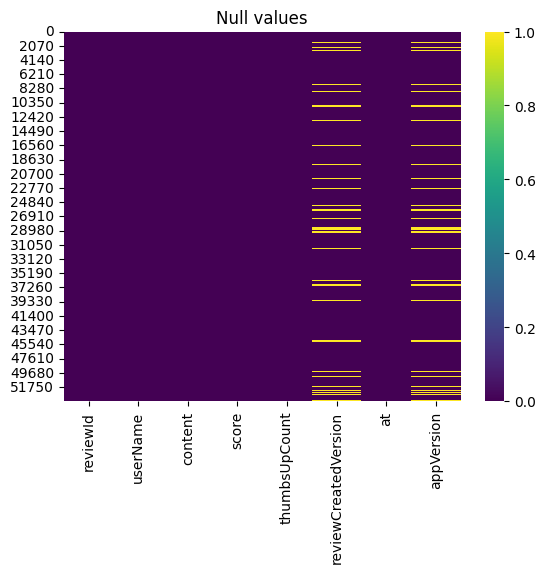

In [9]:
### To create Null values heatmap ###
sns.heatmap(df.isnull(),cmap='viridis')
plt.title('Null values')
plt.show()

# **Data cleaning**

In [10]:
### Removed unwanted columns ###
drop_column = df.drop(columns=['reviewCreatedVersion','appVersion','reviewId','userName'],axis=1)
print(drop_column.head())

                                             content  score  thumbsUpCount  \
0                                Great shopping app!      5              0   
1                                           Ugly app      2              0   
2  never thought of using but I think I will enjo...      5              0   
3  Easy and quick shopping, fast shipping only ta...      5              0   
4  Rarely is anything delivered by promised times...      1              0   

                    at  
0  2024-06-22 21:21:45  
1  2024-06-22 21:03:00  
2  2024-06-22 20:42:50  
3  2024-06-22 20:37:07  
4  2024-06-22 20:32:40  


In [11]:
### Removed empty spaces ####
drop_rows = drop_column.dropna(how='any')
print(drop_rows.head())

                                             content  score  thumbsUpCount  \
0                                Great shopping app!      5              0   
1                                           Ugly app      2              0   
2  never thought of using but I think I will enjo...      5              0   
3  Easy and quick shopping, fast shipping only ta...      5              0   
4  Rarely is anything delivered by promised times...      1              0   

                    at  
0  2024-06-22 21:21:45  
1  2024-06-22 21:03:00  
2  2024-06-22 20:42:50  
3  2024-06-22 20:37:07  
4  2024-06-22 20:32:40  


In [12]:
### Check duplicates count ###
print(drop_rows.duplicated().sum())

114


In [13]:
### Drop duplicates ###
dup = drop_rows.drop_duplicates()
print(dup)

                                                 content  score  \
0                                    Great shopping app!      5   
1                                               Ugly app      2   
2      never thought of using but I think I will enjo...      5   
3      Easy and quick shopping, fast shipping only ta...      5   
4      Rarely is anything delivered by promised times...      1   
...                                                  ...    ...   
53808  Amazon Smile donates. Make sure you get all se...      5   
53809  After having problems with the app and having ...      5   
53810  Used to be great. Got greedy, they ruined the ...      1   
53811  New search bar location sucks. At least give m...      2   
53812  for me personally I use Amazon prime due to be...      5   

       thumbsUpCount                   at  
0                  0  2024-06-22 21:21:45  
1                  0  2024-06-22 21:03:00  
2                  0  2024-06-22 20:42:50  
3                  

In [14]:
print(dup.isnull().sum())

content          0
score            0
thumbsUpCount    0
at               0
dtype: int64


# **Check corr-relation**

In [15]:
corr_column = dup.drop(['content','at'],axis=1)
print(corr_column)

       score  thumbsUpCount
0          5              0
1          2              0
2          5              0
3          5              0
4          1              0
...      ...            ...
53808      5              0
53809      5              1
53810      1              0
53811      2              0
53812      5              0

[53697 rows x 2 columns]


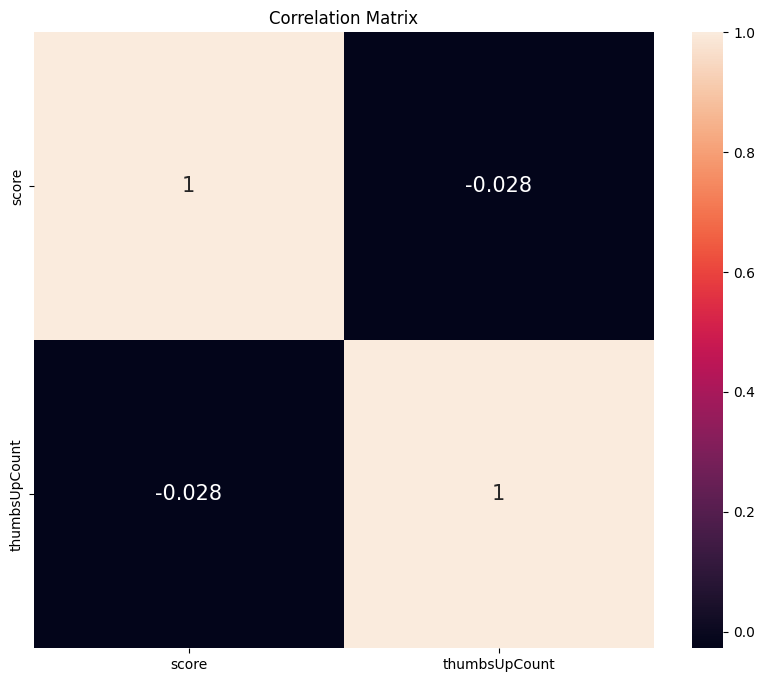

In [20]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr_column.corr(),annot=True,annot_kws={'size':15})
plt.title('Correlation Matrix')
plt.show()

# **View data visualization via plot/chart**

In [21]:
data = dup['score'].value_counts()
print(data)

score
1    25714
5    12662
2     6711
3     5025
4     3585
Name: count, dtype: int64


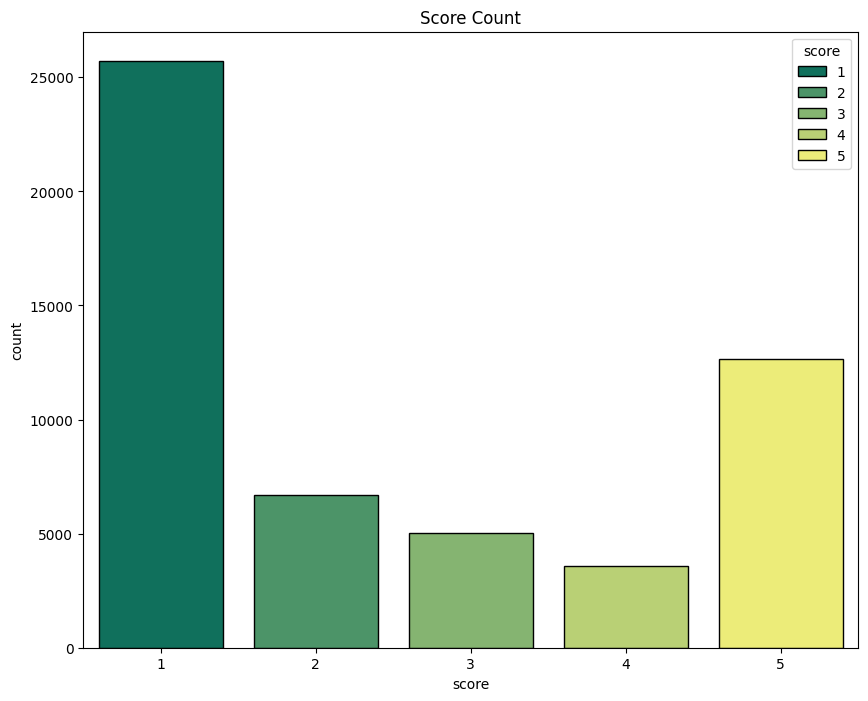

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(data=dup,x='score',hue='score',edgecolor='black',palette='summer')
plt.title('Score Count')
plt.show()

In [23]:
scores= dup['score'].value_counts()
fig = px.pie(scores,values=scores,names=scores.index,title='Score Percentage Variation',height=500,width=800,template='plotly_dark')
fig.show()

# **Creat a sentiment column based on score**

In [24]:
### Create a sentiment column based on score ###
a = dup['score']
def sentiment(a):
  if a > 3:
    return 'Positive'
  elif a == 3:
    return 'Neutral'
  else:
    return 'Negative'

dup['sentiment'] = dup['score'].apply(sentiment)
print(dup.head())

                                             content  score  thumbsUpCount  \
0                                Great shopping app!      5              0   
1                                           Ugly app      2              0   
2  never thought of using but I think I will enjo...      5              0   
3  Easy and quick shopping, fast shipping only ta...      5              0   
4  Rarely is anything delivered by promised times...      1              0   

                    at sentiment  
0  2024-06-22 21:21:45  Positive  
1  2024-06-22 21:03:00  Negative  
2  2024-06-22 20:42:50  Positive  
3  2024-06-22 20:37:07  Positive  
4  2024-06-22 20:32:40  Negative  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11552\2321150474.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# **View sentiment review count via plot/chart**

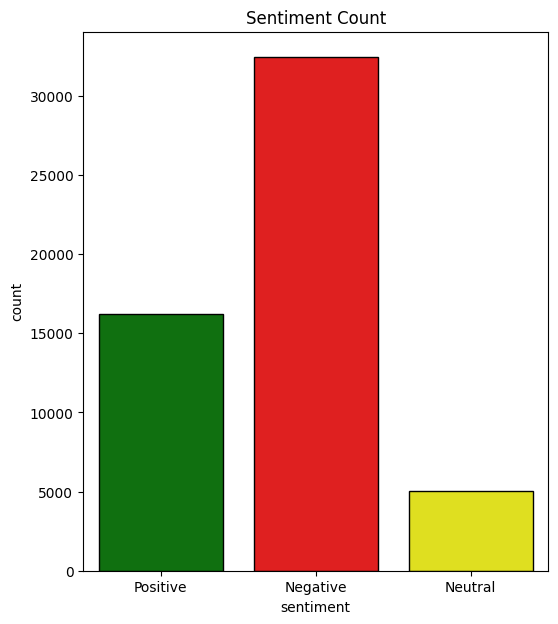

In [25]:
bar_chart = plt.figure(figsize=(6,7))
sns.countplot(data=dup,x='sentiment',edgecolor='black'
              ,palette={'Positive':'green','Neutral':'yellow','Negative':'red'},hue='sentiment',legend=False)
plt.title('Sentiment Count')
plt.show()

In [26]:
colors = ('red','green','yellow')
tags = dup['sentiment'].value_counts()
px.pie(tags,values=tags,names=tags.index,title='Sentiment Percentage Variation',height=500,width=800,color_discrete_sequence=colors,template='plotly_dark')

# **Cleaning and tokenizing the string data with the help of re and NLP(ML)**

In [27]:
content_column = dup.drop(columns=['score','thumbsUpCount','at'],axis=1)
print(content_column.head())

                                             content sentiment
0                                Great shopping app!  Positive
1                                           Ugly app  Negative
2  never thought of using but I think I will enjo...  Positive
3  Easy and quick shopping, fast shipping only ta...  Positive
4  Rarely is anything delivered by promised times...  Negative


In [28]:
from sys import flags
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def processing(text):
  text = content_column['content'].str.lower()
  url_pattern = re.sub(r'https?://\S+|www\.\S+','',text,flags=re.MULTILINE)
  punc_pattern = re.sub(r'[^\w\s]','',url_pattern)
  special_char_pattern = re.sub(r'[^a-zA-Z0-9\s]','',punc_pattern)
  special_char_pattern = re.sub(r'\@W+|\#',' ',special_char_pattern)
  text_tokens = word_tokenize(special_char_pattern)
  stop_words = set(stopwords.words('english'))
  filtered_text = [word for word in text_tokens if word not in stop_words]
  return ' '.join(filtered_text)

# **Filter the Positive review and plot the Positive review wordcloud**

In [29]:
positive_result = content_column[content_column.sentiment == 'Positive']
print(positive_result.head())

                                             content sentiment
0                                Great shopping app!  Positive
2  never thought of using but I think I will enjo...  Positive
3  Easy and quick shopping, fast shipping only ta...  Positive
5                                            awesome  Positive
7                                            amazing  Positive


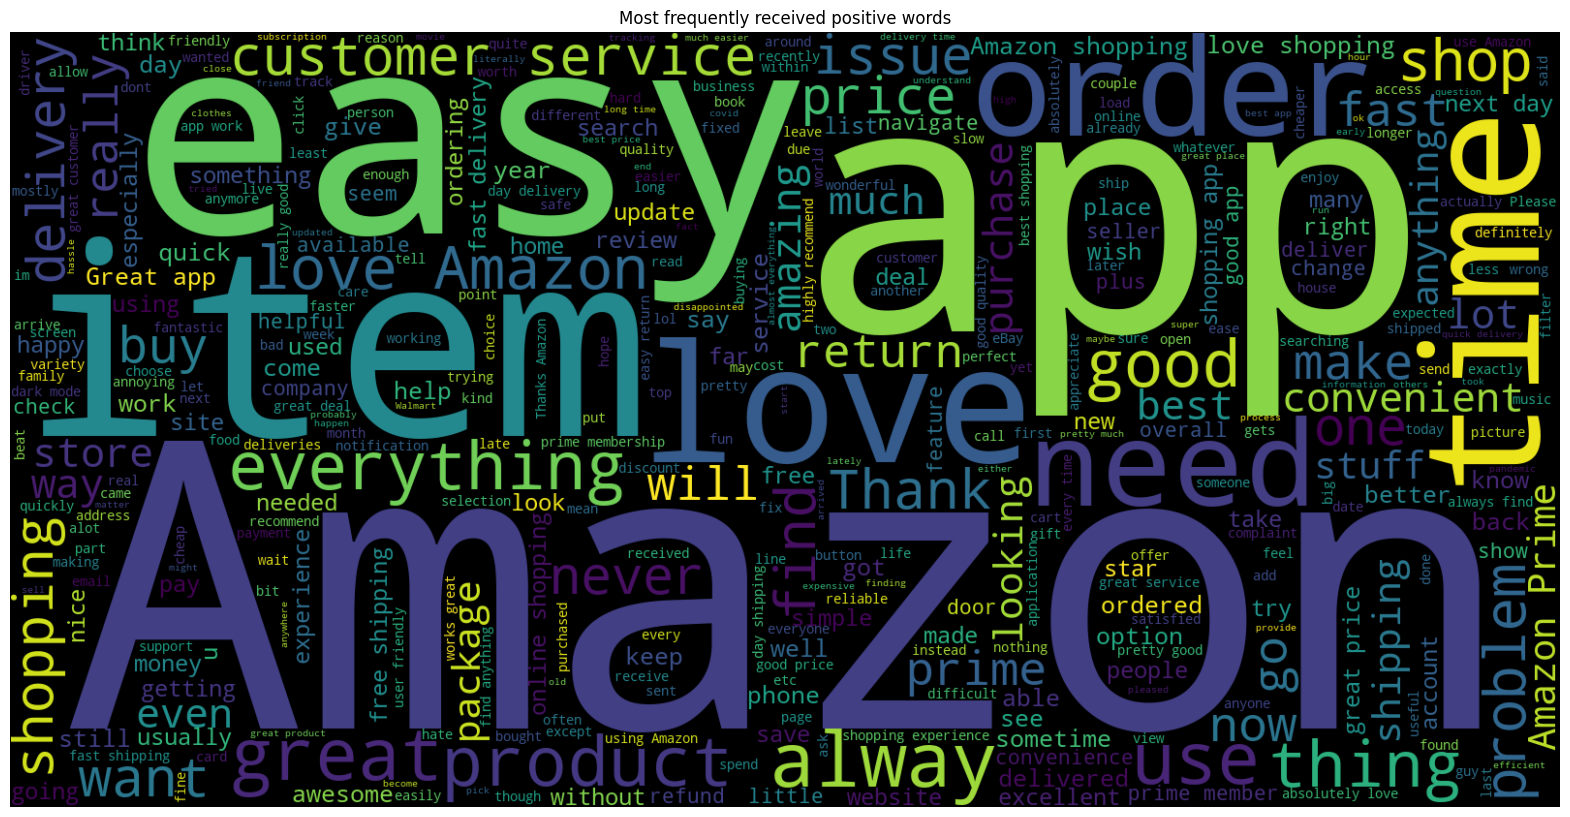

In [30]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

text = ' '.join([word for word in positive_result['content']])
plt.figure(figsize=(20,16))
wordcloud = WordCloud(max_words=400,background_color='black',height=800,width=1600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequently received positive words')
plt.show()

# **Filter the Neutral review and plot the Neutral review wordcloud**

In [31]:
neutral_result = content_column[content_column.sentiment == 'Neutral']
print(neutral_result.head())

                                               content sentiment
30   The latest update doesn't even show the overal...   Neutral
58                                Fingers are crossed!   Neutral
103  AMAZON, BRING BACK USER-QUESTIONS-BROWSING AND...   Neutral
113  Good app. However, the price changes in the ca...   Neutral
119  Carnt make it passed the payment screen IT tak...   Neutral


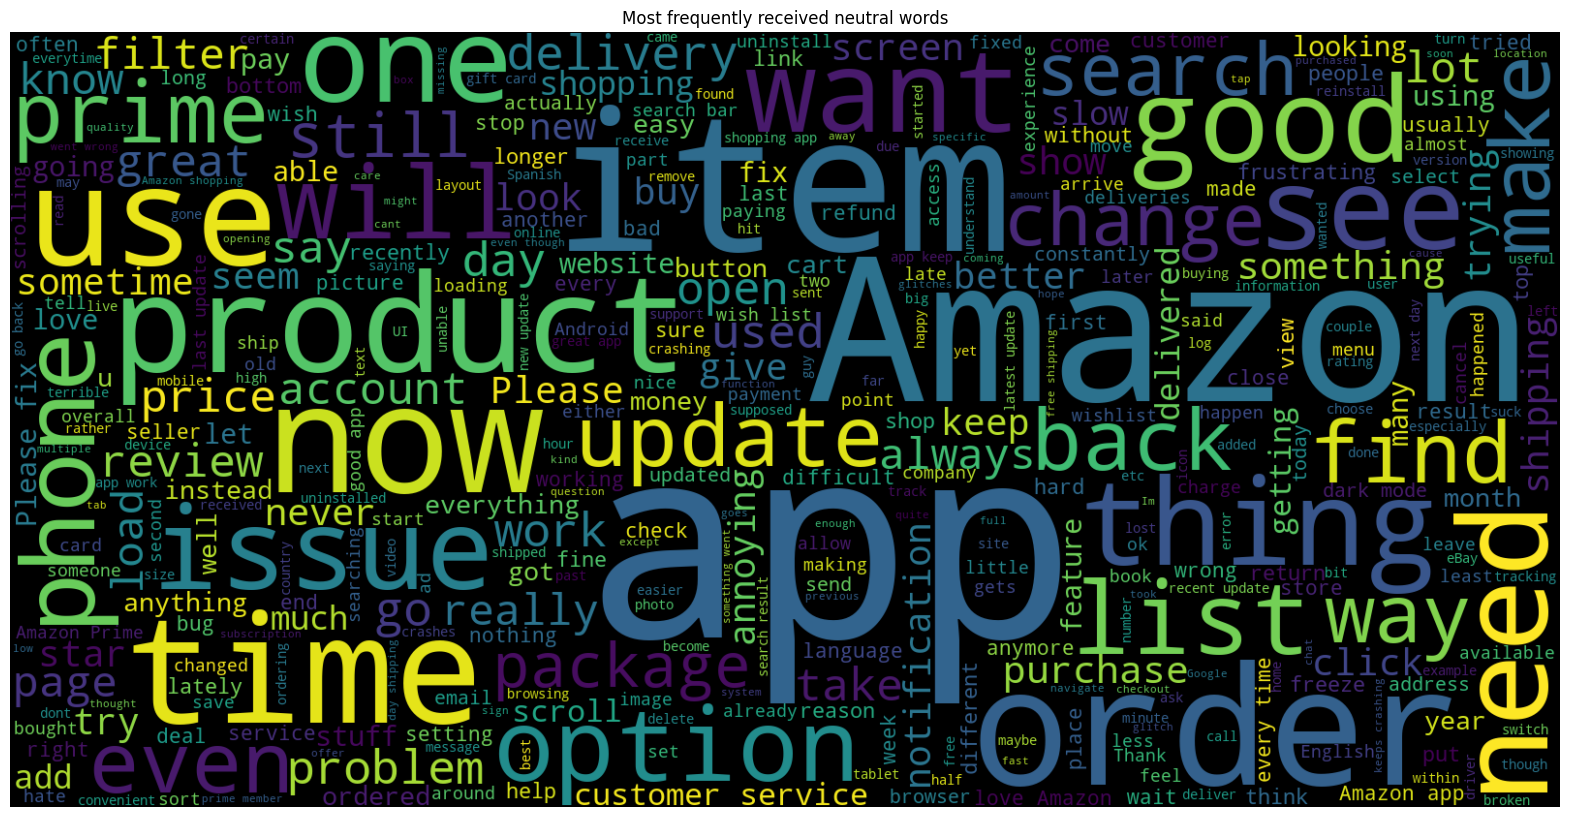

In [32]:
text= ' '.join([word for word in neutral_result['content']])
plt.figure(figsize=(20,16))
wordcloud = WordCloud(max_words=400,background_color='black',height=800,width=1600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequently received neutral words')
plt.show()

# **Filter the Negative review and plot the Negative review wordcloud**

In [33]:
negative_result = content_column[content_column.sentiment == 'Negative']
print(negative_result.head())

                                              content sentiment
1                                            Ugly app  Negative
4   Rarely is anything delivered by promised times...  Negative
6                                              Delete  Negative
10                  Updated app is completely broken.  Negative
12  I understand security. But, gltchy security is...  Negative


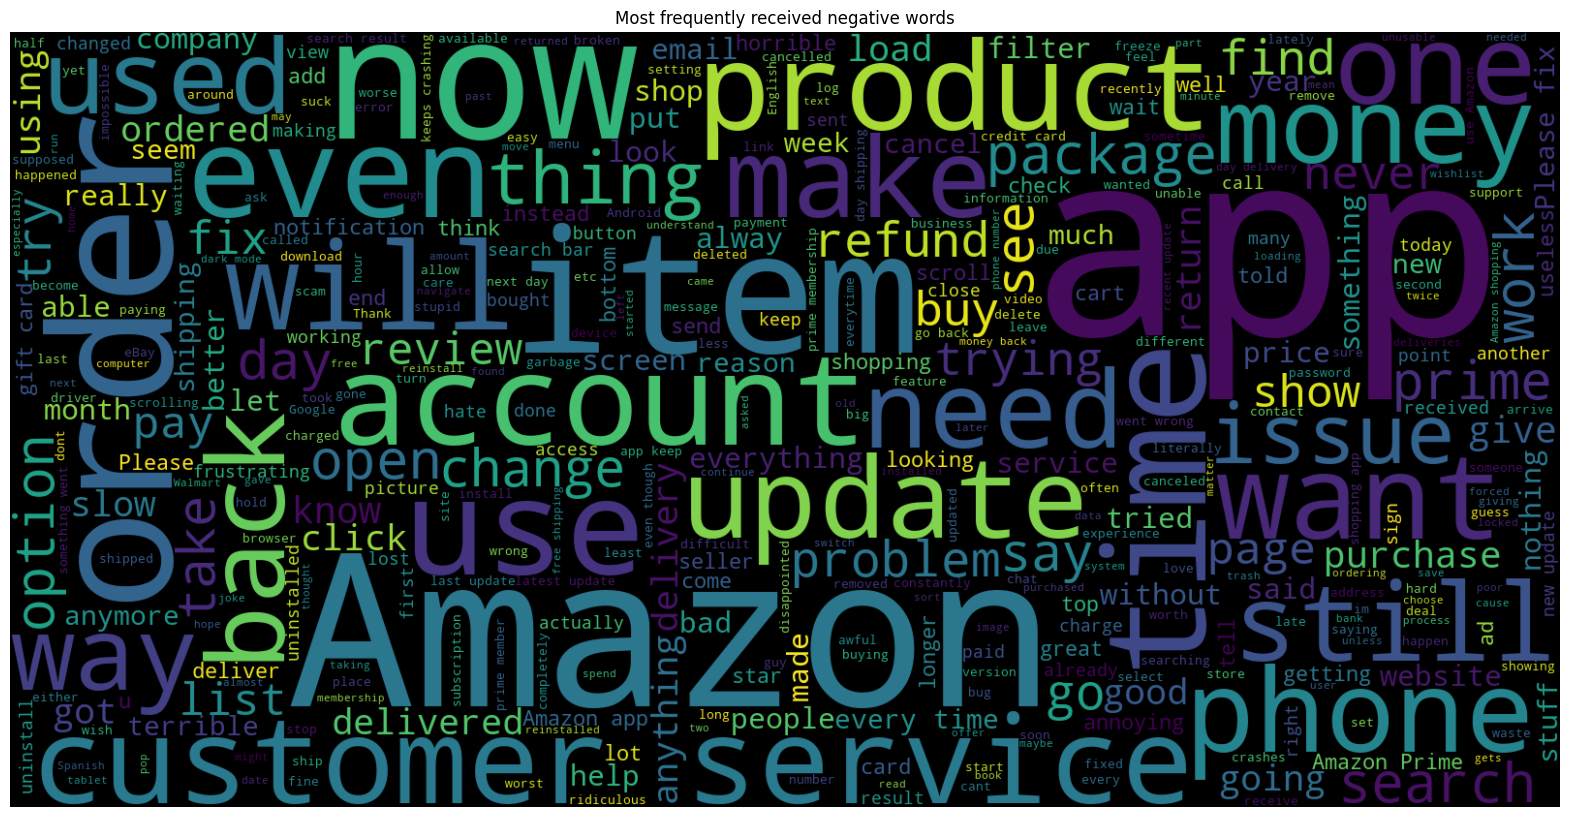

In [34]:
text = ' '.join([word for word in negative_result['content']])
plt.figure(figsize=(20,16))
wordcloud = WordCloud(max_words=400,background_color='black',height=800,width=1600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequently received negative words')
plt.show()

# **Features extraction for Countvector**

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(ngram_range=(1,2)).fit(dup['content'])
print(vector)

CountVectorizer(ngram_range=(1, 2))


In [36]:
feature_names = vector.get_feature_names_out()
print('Name of features: {}\n'.format(len(feature_names)))
print('First 20 features:\n{}'.format(feature_names[:20]))

Name of features: 434929

First 20 features:
['00' '00 am' '00 am_pm' '00 amazon' '00 an' '00 and' '00 any' '00 back'
 '00 balance' '00 because' '00 books' '00 brought' '00 buck' '00 bucks'
 '00 but' '00 by' '00 charge' '00 coupon' '00 credit' '00 crooks']


# **Used Logestic Regression and check the final accuracy output**

In [37]:
x = dup['content']
y = dup['sentiment']
x =vector.transform(x)

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [39]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy: 82.97%
Confusion Matrix:
 [[8982  325  412]
 [1023  178  288]
 [ 526  169 4207]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.92      0.89      9719
     Neutral       0.26      0.12      0.16      1489
    Positive       0.86      0.86      0.86      4902

    accuracy                           0.83     16110
   macro avg       0.66      0.63      0.64     16110
weighted avg       0.80      0.83      0.81     16110

